In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

|Feature Name||Description|
|------------||-----------|
|BHK||Bedroom Hall Kitchen|
|Rent|| Price Of The House|
|Floor||The Floor Of The Apartment|
|Area Type|| Type of Area|
|Area Locality|| Locality of House|
|Furnishing Status|| Whether The Apartment is Furnished or not|
|Tenant Preferred||Type of Tenant Preferred|
|Bathroom ||Number Of Bathrooms|
|Point of Contact||Whom to Contact to|


# IMPORT THE DATASET

In [2]:
df=pd.read_csv("House_Rent_Dataset.csv")

In [3]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


# EXPLORATORY DATA ANALYSIS

In [4]:
df["Floor"].values

array(['Ground out of 2', '1 out of 3', '1 out of 3', ..., '3 out of 5',
       '23 out of 34', '4 out of 5'], dtype=object)

In [5]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [6]:
df['Posted On'] = pd.to_datetime(df["Posted On"])

In [7]:
# DATA VALUES 
df['month posted'] = df['Posted On'].dt.month
df['day posted'] = df['Posted On'].dt.day
df['day of week posted'] = df['Posted On'].dt.day_of_week
df['quarter poster'] = df['Posted On'].dt.quarter

In [8]:
df.isnull().sum()

Posted On             0
BHK                   0
Rent                  0
Size                  0
Floor                 0
Area Type             0
Area Locality         0
City                  0
Furnishing Status     0
Tenant Preferred      0
Bathroom              0
Point of Contact      0
month posted          0
day posted            0
day of week posted    0
quarter poster        0
dtype: int64

In [9]:
print(df.duplicated().sum())
df = df.drop_duplicates()

0


# DATA PREPROCESSING

In [10]:
d=list(df["Floor"].str[:2])
b=list(df["Floor"].str[-2:])

floor1=pd.DataFrame(d,columns=["Current"] ) 
floor2=pd.DataFrame(b,columns=["Total"] )

floor4=pd.concat([floor1,floor2],axis=1)
floor4

,Current,Total
0,Gr,2
1,1,3
2,1,3
3,1,2
4,1,2
...,...,...
4741,3,5
4742,1,4
4743,3,5
4744,23,34


In [11]:
df=df.drop("Floor",axis=1)


In [12]:
df=df.drop("Area Locality",axis=1)

In [13]:
data=pd.concat([df,floor4],axis=1)
data=data.drop("Posted On",axis=1)

In [14]:
data

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,month posted,day posted,day of week posted,quarter poster,Current,Total
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,18,2,2,Gr,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,13,4,2,1,3
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,16,0,2,1,3
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7,4,0,3,1,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,5,9,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,5,18,2,2,3,5
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,5,15,6,2,1,4
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,7,10,6,3,3,5
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,7,6,2,3,23,34


In [15]:
data["Current"].value_counts()

1     1159
2      945
Gr     927
3      511
4      272
5      164
6       93
7       74
10      67
8       66
9       65
12      47
11      43
15      41
14      34
18      26
Up      23
17      22
16      21
19      16
13      15
20      12
25      12
Lo      11
23       9
24       6
21       6
30       5
34       4
28       4
27       3
35       3
22       3
32       3
26       3
65       3
60       3
40       2
36       2
48       2
45       2
53       2
1        2
44       1
41       1
46       1
33       1
37       1
50       1
39       1
43       1
29       1
49       1
47       1
76       1
3        1
Name: Current, dtype: int64

In [16]:
data["Current"]=data["Current"].replace("Gr",0)
data["Current"]=data["Current"].replace("Up",-1)
data["Current"]=data["Current"].replace("Lo",-2)

In [17]:
data

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,month posted,day posted,day of week posted,quarter poster,Current,Total
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,18,2,2,0,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,13,4,2,1,3
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,16,0,2,1,3
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7,4,0,3,1,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,5,9,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,5,18,2,2,3,5
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,5,15,6,2,1,4
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,7,10,6,3,3,5
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,7,6,2,3,23,34


In [18]:
data["Total"].value_counts()

 4    938
 3    914
 2    868
 5    422
 1    333
     ... 
81      1
66      1
3       1
nd      1
89      1
Name: Total, Length: 69, dtype: int64

In [19]:
data["Total"]=data["Total"].replace("nd",0)

In [20]:
data["Current"]=pd.to_numeric(data["Current"],errors='coerce')
data["Total"]=pd.to_numeric(data["Total"],errors='coerce')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4746 entries, 0 to 4745
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   BHK                 4746 non-null   int64 
 1   Rent                4746 non-null   int64 
 2   Size                4746 non-null   int64 
 3   Area Type           4746 non-null   object
 4   City                4746 non-null   object
 5   Furnishing Status   4746 non-null   object
 6   Tenant Preferred    4746 non-null   object
 7   Bathroom            4746 non-null   int64 
 8   Point of Contact    4746 non-null   object
 9   month posted        4746 non-null   int64 
 10  day posted          4746 non-null   int64 
 11  day of week posted  4746 non-null   int64 
 12  quarter poster      4746 non-null   int64 
 13  Current             4746 non-null   int64 
 14  Total               4746 non-null   int64 
dtypes: int64(10), object(5)
memory usage: 593.2+ KB


In [22]:
categorical=["Area Type","City","Furnishing Status","Tenant Preferred","Point of Contact"]
categorical

['Area Type',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Point of Contact']

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [24]:
one_encoder=OneHotEncoder(sparse=False,drop='first')
val=one_encoder.fit_transform(data[categorical])
val1=pd.DataFrame(val)

In [25]:
data=data.drop(categorical,axis=1)

In [26]:
data=pd.concat([data,val1],axis=1)

In [27]:
data

,BHK,Rent,Size,Bathroom,month posted,day posted,day of week posted,quarter poster,Current,Total,...,3,4,5,6,7,8,9,10,11,12
0,2,10000,1100,2,5,18,2,2,0,2,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,2,20000,800,1,5,13,4,2,1,3,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2,17000,1000,1,5,16,0,2,1,3,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,2,10000,800,1,7,4,0,3,1,2,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,2,7500,850,1,5,9,0,2,1,2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,2,5,18,2,2,3,5,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4742,3,29000,2000,3,5,15,6,2,1,4,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4743,3,35000,1750,3,7,10,6,3,3,5,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4744,3,45000,1500,2,7,6,2,3,23,34,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [28]:
X=data.drop(["Rent"],axis=1)
y=(data["Rent"])

In [29]:
X


,BHK,Size,Bathroom,month posted,day posted,day of week posted,quarter poster,Current,Total,0,...,3,4,5,6,7,8,9,10,11,12
0,2,1100,2,5,18,2,2,0,2,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,2,800,1,5,13,4,2,1,3,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2,1000,1,5,16,0,2,1,3,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,2,800,1,7,4,0,3,1,2,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,2,850,1,5,9,0,2,1,2,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,1000,2,5,18,2,2,3,5,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4742,3,2000,3,5,15,6,2,1,4,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4743,3,1750,3,7,10,6,3,3,5,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4744,3,1500,2,7,6,2,3,23,34,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [30]:

y

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4746, dtype: int64

# ASSUMPTIONS OF OLS MODEL

In [31]:
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(y,X)

In [32]:
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rent   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     102.7
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:14:32   Log-Likelihood:                -59274.
No. Observations:                4746   AIC:                         1.186e+05
Df Residuals:                    4723   BIC:                         1.187e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -676.0465    4.7e+04     -0.014      0.989   -9.29e+04    9.15e+04
BHK                 2318.3700   2025.598      1.145      0.252   -1652.747    6289.487
Size                  40.1338      2.471     16.239      0.000      35.289      44.979
Bathroom            8994.6215   2106.665      4.270      0.000    4864.576    1.31e+04
month posted         290.1565   1842.242      0.158      0.875   -3321.496    3901.809
day posted          -221.4790    125.566     -1.764      0.078    -467.646      24.688
day of week posted  -490.1625    519.363     -0.944      0.345   -1508.357     528.032
quarter poster     -7504.9931   3706.890     -2.025      0.043   -1.48e+04    -237.761
Current              854.7428    320.014      2.671      0.008     227.366    1482.120
Total                309.5264    210.781      1.468      0.142    -103.703     722.755
0                  -2964.6254   4.56e+04     -0.065      0.948   -9.24e+04    8.65e+04
1                  -6688.9367   4.56e+04     -0.147      0.883   -9.61e+04    8.27e+04
2                  -5494.7965   3128.282     -1.756      0.079   -1.16e+04     638.095
3                   9433.0600   3564.628      2.646      0.008    2444.727    1.64e+04
4                   -1.52e+04   3183.705     -4.774      0.000   -2.14e+04   -8958.481
5                   -895.2626   3742.111     -0.239      0.811   -8231.546    6441.021
6                    4.34e+04   3830.019     11.331      0.000    3.59e+04    5.09e+04
7                  -8492.2187   2872.468     -2.956      0.003   -1.41e+04   -2860.842
8                  -7971.7513   2977.134     -2.678      0.007   -1.38e+04   -2135.180
9                    930.1658   2715.662      0.343      0.732   -4393.799    6254.131
10                 -8843.3104   3833.992     -2.307      0.021   -1.64e+04   -1326.898
11                  2.597e+04   6.46e+04      0.402      0.687   -1.01e+05    1.53e+05
12                 -7435.6571   2929.795     -2.538      0.011   -1.32e+04   -1691.893
==============================================================================
Omnibus:                    12893.978   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        540664081.600
Skew:                          33.029   Prob(JB):                         0.00
Kurtosis:                    1655.185   Cond. No.                     9.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

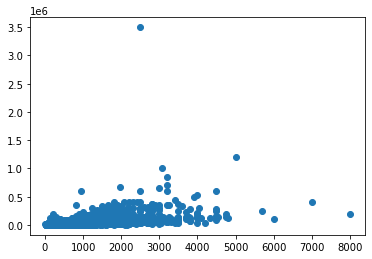

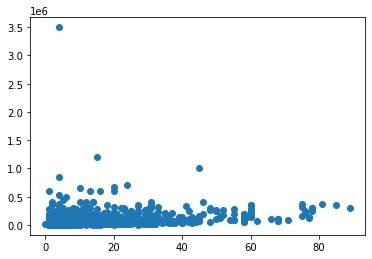

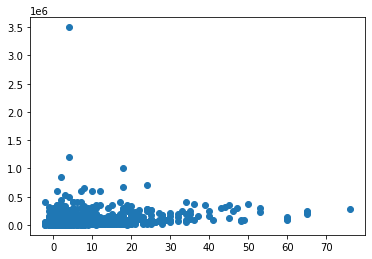

In [33]:
#checking linearity assumption
tyui=["Size","Total","Current"]
for col in tyui:
    plt.scatter(X[col],y)
    plt.show()


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
{X.columns[i]: variance_inflation_factor(X.values,i) for i in range(1,X.shape[1])}

{'BHK': 3.2527123973259404,
 'Size': 2.8116883545417273,
 'Bathroom': 3.9741398699300845,
 'month posted': 2.6915950029818054,
 'day posted': 1.510368947709002,
 'day of week posted': 1.0360904823993486,
 'quarter poster': 2.5735377476923764,
 'Current': 3.907595531033066,
 'Total': 4.557592483885006,
 0: 595.5530160153678,
 1: 594.5465694955338,
 2: 1.7083438803389606,
 3: 1.6178956073945416,
 4: 1.7340227047236874,
 5: 1.5745063533715398,
 6: 2.7348376264652794,
 7: 2.3551464454516395,
 8: 2.396352934537101,
 9: 1.6806882069460487,
 10: 1.507094122795166,
 11: 1.0048328224994878,
 12: 2.1465616126590628}

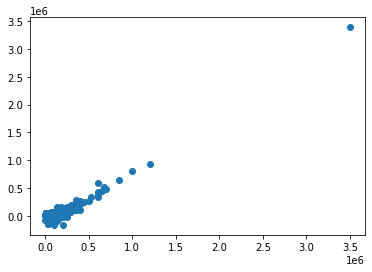

In [35]:
#heteroscedaticity
resuduals=result.resid
plt.scatter(y,resuduals)

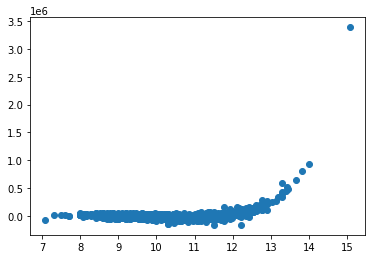

In [36]:
#removing heteroscedasticity using log
resuduals=result.resid
plt.scatter(np.log1p(y),resuduals)

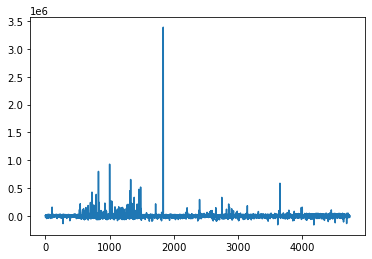

In [37]:
# checking Auto correlation

plt.plot(resuduals.index,resuduals)

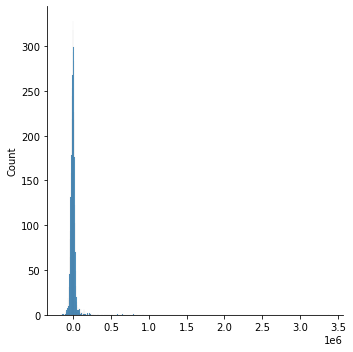

In [38]:
# checking the normality assumption without using log_scale
import seaborn as sns 

sns.displot(resuduals)

plt.show()

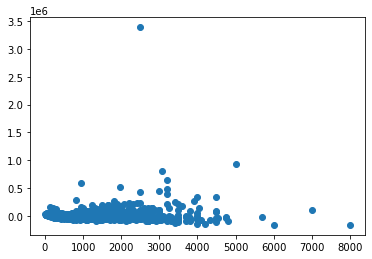

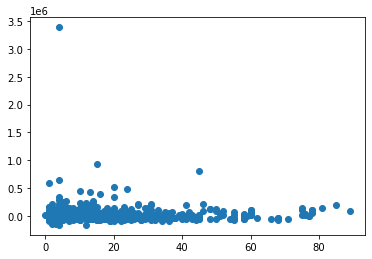

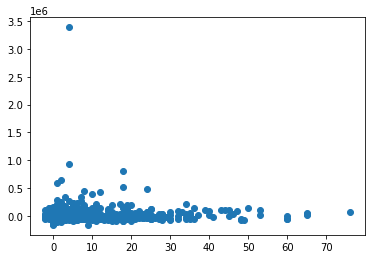

In [39]:
#residual relation with independent variable
for col in tyui:
    plt.scatter(X[col],resuduals)
    plt.show()


In [40]:
#checking assumptions after transformation taking log
y=np.log(y)

In [41]:
X=sm.add_constant(X)
model=sm.OLS(y,X)

In [42]:
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rent   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     949.8
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:14:41   Log-Likelihood:                -2410.6
No. Observations:                4746   AIC:                             4867.
Df Residuals:                    4723   BIC:                             5016.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  8.8855      0.294     30.181      0.000       8.308       9.463
BHK                    0.2276      0.013     17.945      0.000       0.203       0.252
Size                   0.0004   1.55e-05     26.783      0.000       0.000       0.000
Bathroom               0.1502      0.013     11.387      0.000       0.124       0.176
month posted          -0.0088      0.012     -0.767      0.443      -0.031       0.014
day posted            -0.0011      0.001     -1.458      0.145      -0.003       0.000
day of week posted     0.0029      0.003      0.893      0.372      -0.003       0.009
quarter poster         0.0384      0.023      1.654      0.098      -0.007       0.084
Current                0.0038      0.002      1.877      0.061      -0.000       0.008
Total                  0.0044      0.001      3.297      0.001       0.002       0.007
0                      0.1237      0.286      0.433      0.665      -0.436       0.684
1                      0.0849      0.285      0.297      0.766      -0.475       0.645
2                     -0.0413      0.020     -2.107      0.035      -0.080      -0.003
3                      0.1768      0.022      7.922      0.000       0.133       0.221
4                     -0.1614      0.020     -8.100      0.000      -0.201      -0.122
5                     -0.2976      0.023    -12.704      0.000      -0.344      -0.252
6                      0.8970      0.024     37.408      0.000       0.850       0.944
7                     -0.1946      0.018    -10.822      0.000      -0.230      -0.159
8                     -0.2940      0.019    -15.775      0.000      -0.331      -0.257
9                     -0.0473      0.017     -2.783      0.005      -0.081      -0.014
10                    -0.1221      0.024     -5.089      0.000      -0.169      -0.075
11                    -0.4287      0.404     -1.061      0.289      -1.221       0.364
12                    -0.3453      0.018    -18.825      0.000      -0.381      -0.309
==============================================================================
Omnibus:                      843.185   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9688.358
Skew:                           0.498   Prob(JB):                         0.00
Kurtosis:                       9.928   Cond. No.                     9.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

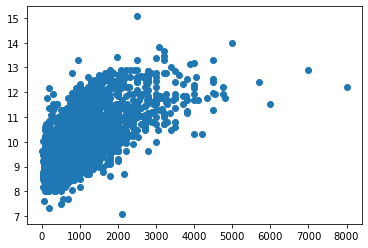

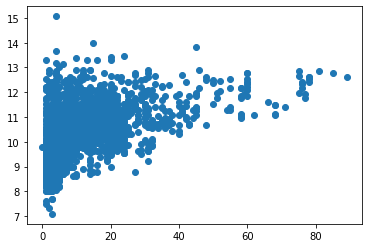

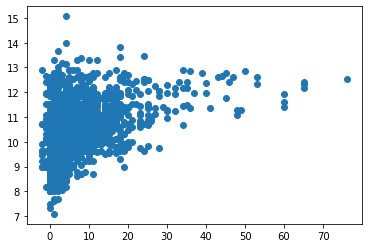

In [43]:
#checking linearity assumption
tyui=["Size","Total","Current"]
for col in tyui:
    plt.scatter(X[col],y)
    plt.show()

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
{X.columns[i]: variance_inflation_factor(X.values,i) for i in range(1,X.shape[1])}

{'BHK': 3.2527123973259404,
 'Size': 2.8116883545417273,
 'Bathroom': 3.9741398699300845,
 'month posted': 2.6915950029818054,
 'day posted': 1.510368947709002,
 'day of week posted': 1.0360904823993486,
 'quarter poster': 2.5735377476923764,
 'Current': 3.907595531033066,
 'Total': 4.557592483885006,
 0: 595.5530160153678,
 1: 594.5465694955338,
 2: 1.7083438803389606,
 3: 1.6178956073945416,
 4: 1.7340227047236874,
 5: 1.5745063533715398,
 6: 2.7348376264652794,
 7: 2.3551464454516395,
 8: 2.396352934537101,
 9: 1.6806882069460487,
 10: 1.507094122795166,
 11: 1.0048328224994878,
 12: 2.1465616126590628}

In [45]:
X=X.drop([0,1],axis=1)

In [46]:
X

,const,BHK,Size,Bathroom,month posted,day posted,day of week posted,quarter poster,Current,Total,...,3,4,5,6,7,8,9,10,11,12
0,1.0,2,1100,2,5,18,2,2,0,2,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1.0,2,800,1,5,13,4,2,1,3,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,2,1000,1,5,16,0,2,1,3,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,2,800,1,7,4,0,3,1,2,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,1.0,2,850,1,5,9,0,2,1,2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,1.0,2,1000,2,5,18,2,2,3,5,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4742,1.0,3,2000,3,5,15,6,2,1,4,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4743,1.0,3,1750,3,7,10,6,3,3,5,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4744,1.0,3,1500,2,7,6,2,3,23,34,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


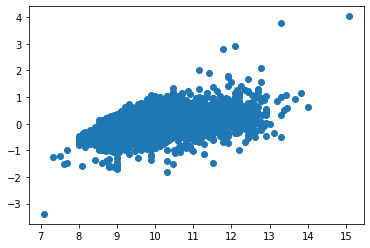

In [47]:
resuduals=result.resid
plt.scatter(y,resuduals)

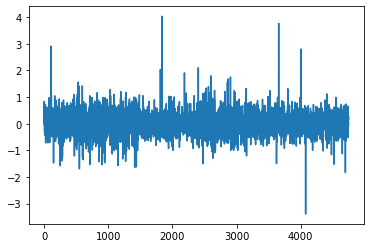

In [49]:
# checking Auto correlation
plt.plot(resuduals.index,resuduals)

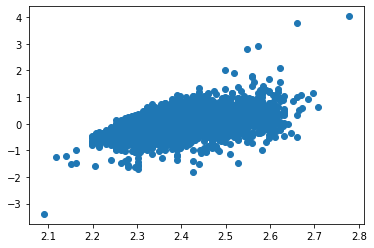

In [48]:
#REMOVING AUTOCORRELATION
resuduals=result.resid
plt.scatter(np.log1p(y),resuduals)

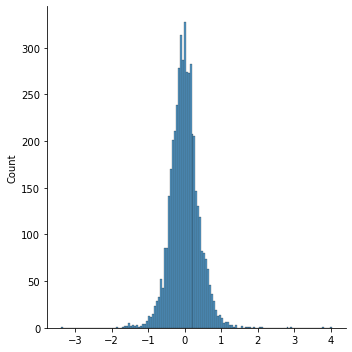

In [50]:
# checking the normality assumption without using log_scale
import seaborn as sns 

sns.displot(resuduals)

plt.show()

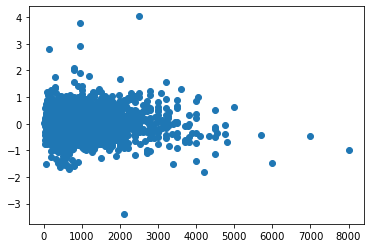

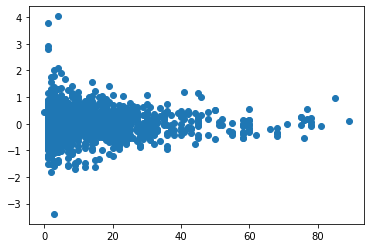

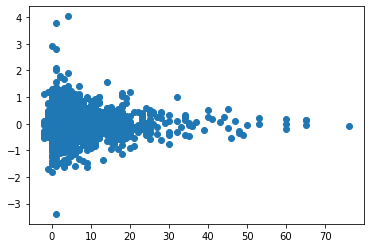

In [51]:
#residual relation with independent variable
for col in tyui:
    plt.scatter(X[col],resuduals)
    plt.show()


In [52]:
dict={}
lis1=[]
for col in X.columns:
    lis1.append(col)
for i in range(1,len(lis1)):
    dict[lis1[i]]=i

In [53]:
dict

{'BHK': 1,
 'Size': 2,
 'Bathroom': 3,
 'month posted': 4,
 'day posted': 5,
 'day of week posted': 6,
 'quarter poster': 7,
 'Current': 8,
 'Total': 9,
 2: 10,
 3: 11,
 4: 12,
 5: 13,
 6: 14,
 7: 15,
 8: 16,
 9: 17,
 10: 18,
 11: 19,
 12: 20}

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-p

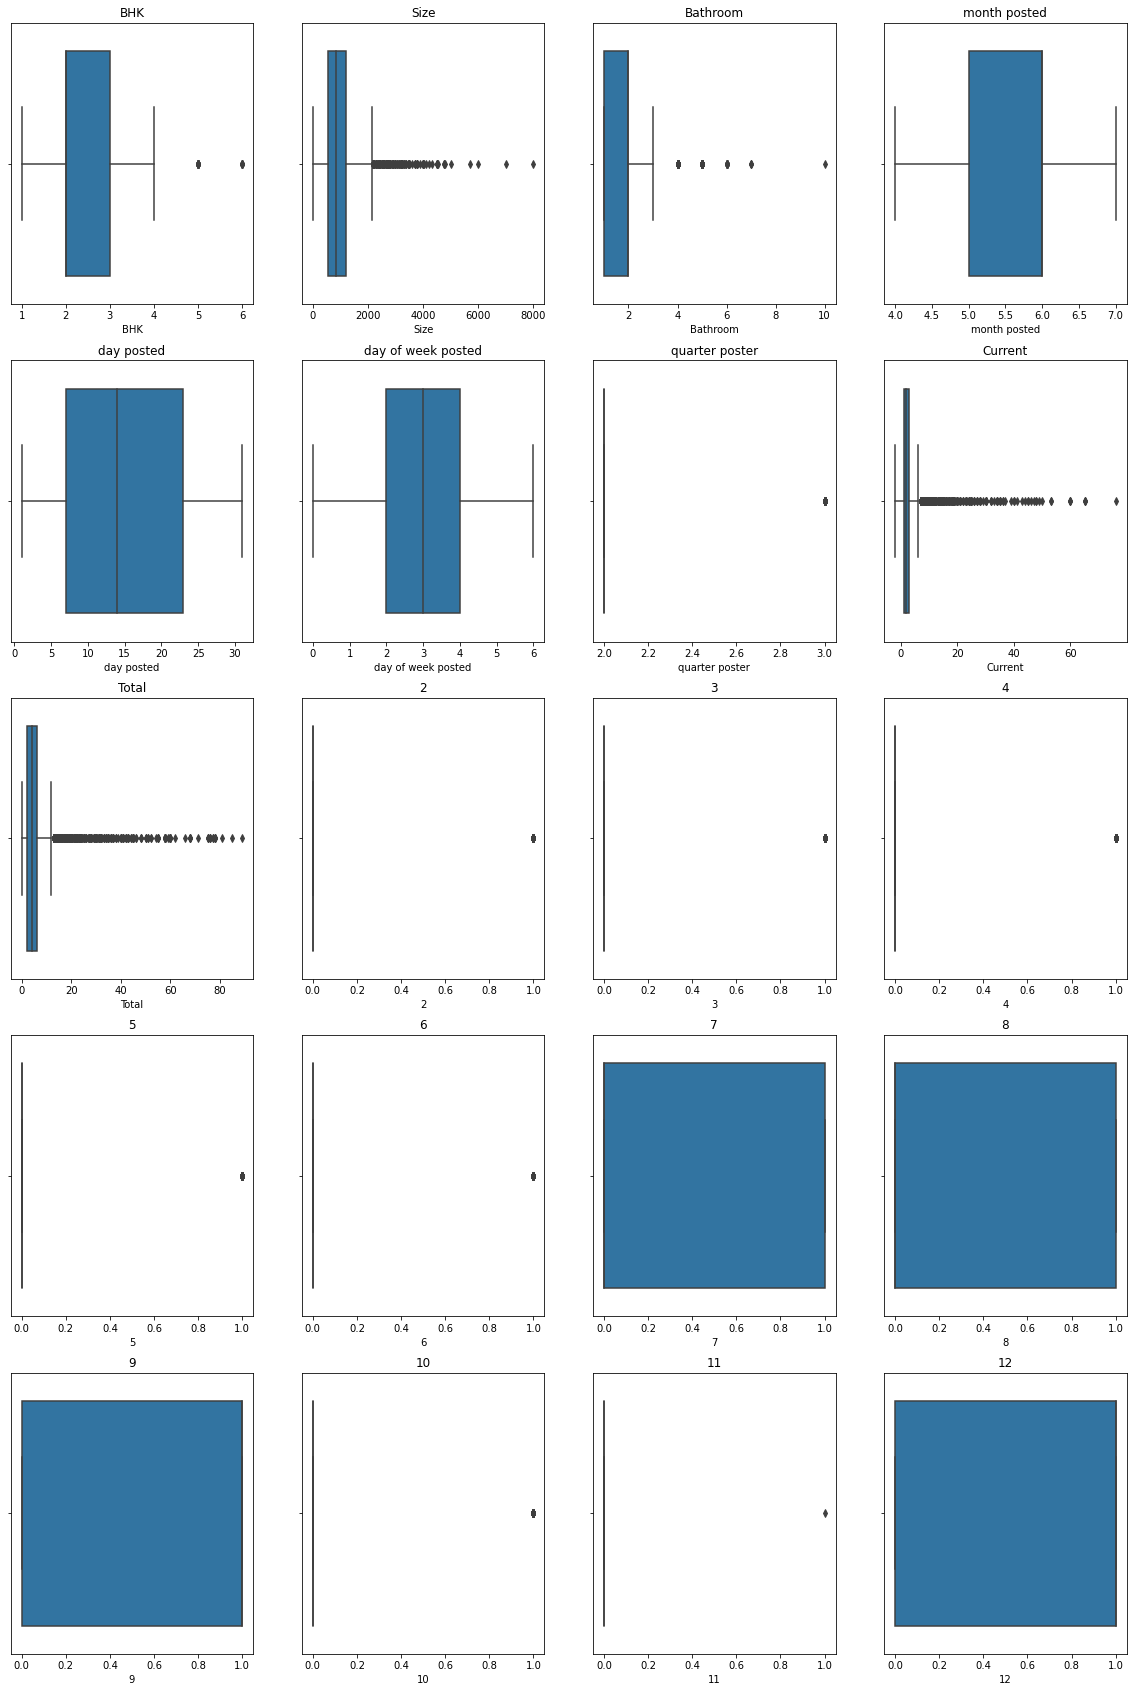

In [54]:
# BEFORE REMOVING OUTLIERS
plt.figure(figsize = (20,30))
for var, i in dict.items():
    plt.subplot(5,4,i)
    sns.boxplot(data[var], whis = 1.5)
    plt.title(var)
plt.show()

In [55]:
numeric_cols = [] 
for i in data.columns:
    if data[i].dtype in (np.float64, np.int64):
        numeric_cols.append(i)

In [56]:
 percent_low = []
percent_high = []
for col in numeric_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - (iqr*1.5)
    high = q3 + (iqr*1.5)
    count_l = len(np.where(data[col] < low)[0])
    count_h = len(np.where(data[col] > high)[0])
    percent_low.append(round(count_l/len(data[col])*100, 2))
    percent_high.append(round(count_h/len(data[col])*100, 2))
outlier_table = pd.DataFrame({'Factor':numeric_cols, 'Lower Bound %':percent_low, 'Upper Bound %':percent_high})
 outlier_table

,Factor,Lower Bound %,Upper Bound %
0,BHK,0.0,0.57
1,Rent,0.0,10.96
2,Size,0.0,4.28
3,Bathroom,0.0,4.89
4,month posted,0.0,0.00
5,day posted,0.0,0.00
6,day of week posted,0.0,0.00
7,quarter poster,0.0,20.61
8,Current,0.0,13.44
9,Total,0.0,14.83


In [57]:
from scipy.stats.mstats import winsorize
for i,col in enumerate(numeric_cols, 1):
    data[col] = winsorize(data[col], (max(percent_low)/100, max(percent_high)/100))

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-p

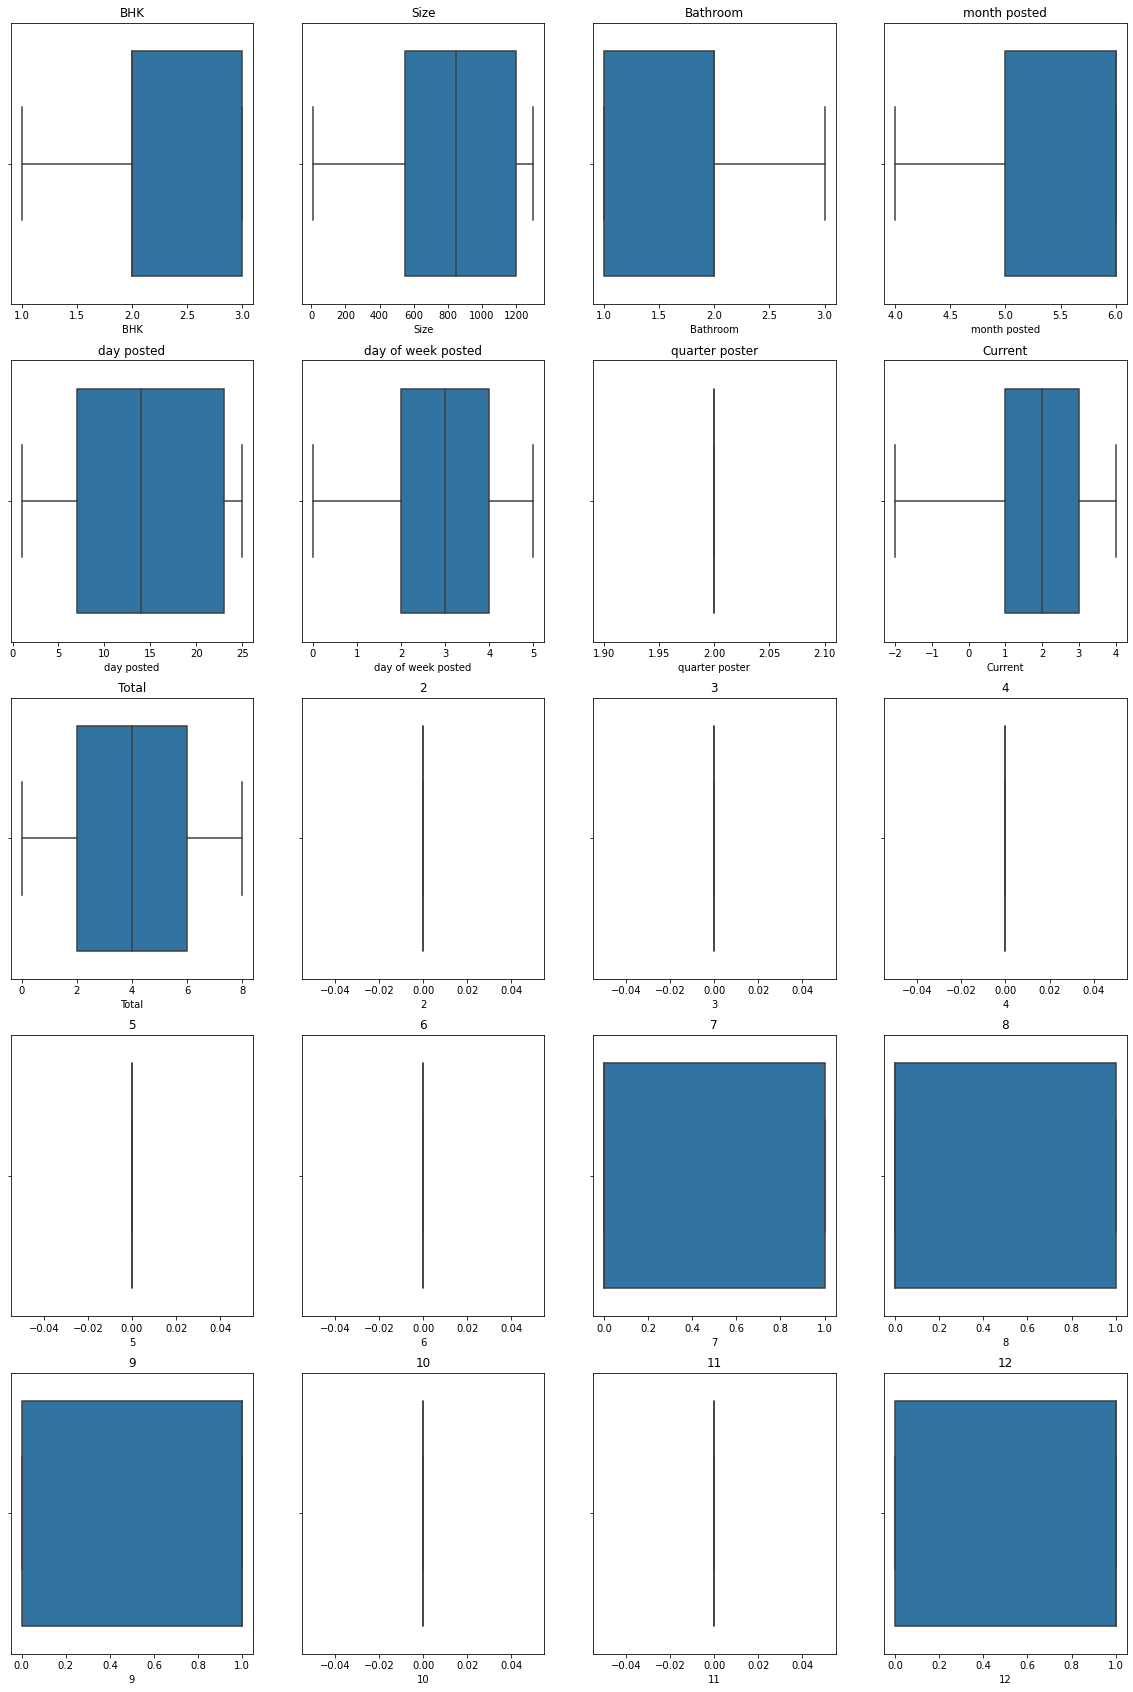

In [58]:
# BEFORE REMOVING OUTLIERS
plt.figure(figsize = (20,30))
for var, i in dict.items():
    plt.subplot(5,4,i)
    sns.boxplot(data[var], whis = 1.5)
    plt.title(var)
plt.show()

# SPLITTING THE DATASET

In [59]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [60]:
X_train.shape

(3322, 21)

In [61]:
X_test.shape

(1424, 21)

In [62]:
y_train.shape

(3322,)

In [63]:
y_test.shape

(1424,)

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[ 0.        , -0.10544874,  0.1987489 , ..., -0.33154661,
         0.        ,  0.68882398],
       [ 0.        , -0.10544874,  0.04369365, ..., -0.33154661,
         0.        ,  0.68882398],
       [ 0.        ,  1.08605024,  0.66391465, ..., -0.33154661,
         0.        ,  0.68882398],
       ...,
       [ 0.        , -1.29694771, -0.54551629, ..., -0.33154661,
         0.        ,  0.68882398],
       [ 0.        , -0.10544874, -0.25866408, ..., -0.33154661,
         0.        , -1.45174969],
       [ 0.        , -1.29694771, -0.34394447, ..., -0.33154661,
         0.        ,  0.68882398]])

In [65]:

scaler.transform(X_test)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[ 0.        , -1.29694771, -0.88663783, ..., -0.33154661,
         0.        , -1.45174969],
       [ 0.        , -0.10544874,  0.1987489 , ..., -0.33154661,
         0.        , -1.45174969],
       [ 0.        , -1.29694771, -0.11136159, ..., -0.33154661,
         0.        ,  0.68882398],
       ...,
       [ 0.        , -0.10544874, -0.11136159, ..., -0.33154661,
         0.        ,  0.68882398],
       [ 0.        , -0.10544874, -0.03383397, ..., -0.33154661,
         0.        ,  0.68882398],
       [ 0.        , -1.29694771, -1.11922071, ..., -0.33154661,
         0.        ,  0.68882398]])

In [66]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [67]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred=regressor1.predict(X_test)
comparison=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
print(comparison)
mse1=mean_squared_error(y_test,y_pred)
r1=r2_score(y_test,regressor1.predict(X_test))
print(r1)

         Actual  Predicted
407    8.612503   8.921353
2013  10.308953  10.058482
2015   9.615805   9.287927
2930   9.210340   9.547301
561   10.691945  11.143735
...         ...        ...
1140  10.373491  10.692430
2169   9.615805   9.399975
1578   9.392662   9.508693
4146   9.433484   9.420217
2983   9.104980   9.073520

[1424 rows x 2 columns]
0.819049655769876


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


# MODEL BUILDING

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [69]:
models={
    "Linear Regression":LinearRegression(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "KNN":KNeighborsRegressor()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train) 
    
    print(list(models.keys())[i])
    
    
    y_pred=model.predict(X_test)
    comparison=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
    
    print(comparison)
    
    
    mse1=mean_squared_error(y_test,y_pred)
    r1=r2_score(y_test,model.predict(X_test))
    
    print("R^2 Score: ",r1)
    
    print("TRAINING DATA ACCURACY:", model.score(X_train, y_train))
    print("TEST DATA ACCURACY", model.score(X_test, y_test))
    print("******************************************************")
    print('\n')

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site

Linear Regression
         Actual  Predicted
407    8.612503   8.921353
2013  10.308953  10.058482
2015   9.615805   9.287927
2930   9.210340   9.547301
561   10.691945  11.143735
...         ...        ...
1140  10.373491  10.692430
2169   9.615805   9.399975
1578   9.392662   9.508693
4146   9.433484   9.420217
2983   9.104980   9.073520

[1424 rows x 2 columns]
R^2 Score:  0.819049655769876
TRAINING DATA ACCURACY: 0.8132494040519245
TEST DATA ACCURACY 0.819049655769876
******************************************************


Decision Tree
         Actual  Predicted
407    8.612503   8.748305
2013  10.308953  10.308953
2015   9.615805   9.903488
2930   9.210340   9.210340
561   10.691945  10.714418
...         ...        ...
1140  10.373491   8.922658
2169   9.615805   8.853665
1578   9.392662   9.581904
4146   9.433484   9.952278
2983   9.104980   9.998798

[1424 rows x 2 columns]
R^2 Score:  0.6729058711053832
TRAINING DATA ACCURACY: 0.9997121631251444
TEST DATA ACCURACY 0.67290587

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


TRAINING DATA ACCURACY: 0.9738320100250875
TEST DATA ACCURACY 0.8189721187449086
******************************************************


KNN


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


         Actual  Predicted
407    8.612503   8.852759
2013  10.308953   9.603601
2015   9.615805   9.653746
2930   9.210340   8.984938
561   10.691945  10.869137
...         ...        ...
1140  10.373491  10.693640
2169   9.615805   9.586294
1578   9.392662   9.818577
4146   9.433484  10.067787
2983   9.104980   8.414621

[1424 rows x 2 columns]
R^2 Score:  0.5431547343229398


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


TRAINING DATA ACCURACY: 0.7066563166705859


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


TEST DATA ACCURACY 0.5431547343229398
******************************************************




In [70]:
rf_params={"max_depth":[5,8,13,None,10],
          "max_features":[5,7,"auto",9,11,12],
          "min_samples_split":[2,8,15,23],
          "n_estimators":[1200,400,800,1000]}
dt_params={"max_depth":[5,8,13,None,10],
           "max_features":[5,7,"auto",9],
           "random_state":[10,35,67,None],
           "max_leaf_nodes":[6,8,9,None]}
knn_params={"n_neighbors":[15,25,30,35,40,45],
            "p":[1,2],
            "n_jobs":[-1,None]}

In [71]:
randomcv_models=[("RANDOM FOREST",RandomForestRegressor(),rf_params),
                 ("Decision Tree",DecisionTreeRegressor(),dt_params),
                ("knn",KNeighborsRegressor(),knn_params)]

In [72]:
randomcv_models

[('RANDOM FOREST',
  RandomForestRegressor(),
  {'max_depth': [5, 8, 13, None, 10],
   'max_features': [5, 7, 'auto', 9, 11, 12],
   'min_samples_split': [2, 8, 15, 23],
   'n_estimators': [1200, 400, 800, 1000]}),
 ('Decision Tree',
  DecisionTreeRegressor(),
  {'max_depth': [5, 8, 13, None, 10],
   'max_features': [5, 7, 'auto', 9],
   'random_state': [10, 35, 67, None],
   'max_leaf_nodes': [6, 8, 9, None]}),
 ('knn',
  KNeighborsRegressor(),
  {'n_neighbors': [15, 25, 30, 35, 40, 45],
   'p': [1, 2],
   'n_jobs': [-1, None]})]

# HYPER PARAMETRIC TRAINING

In [73]:
from sklearn.model_selection import RandomizedSearchCV

model_param={}
for name,model,params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3,verbose=2,n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_
    
for model_name in model_param:
    print(f"------------------best parameters for {model_name}----------".format(model_name))
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 24 candidates, totalling 72 fits
------------------best parameters for RANDOM FOREST----------
{'n_estimators': 1200, 'min_samples_split': 2, 'max_features': 9, 'max_depth': 10}
------------------best parameters for Decision Tree----------
{'random_state': 67, 'max_leaf_nodes': None, 'max_features': 'auto', 'max_depth': 8}
------------------best parameters for knn----------
{'p': 1, 'n_neighbors': 15, 'n_jobs': -1}


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [75]:
models={
    "Linear Regression":LinearRegression(),
    "Decision Tree":DecisionTreeRegressor(random_state=67,max_leaf_nodes=None,max_features="auto",max_depth=8),
    "Random Forest": RandomForestRegressor(n_estimators=1200,min_samples_split=2,max_features=9,max_depth=10),
    "KNN":KNeighborsRegressor(p=1,n_neighbors=15,n_jobs=-1)
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train) 
    
    print(list(models.keys())[i])
    
    
    y_pred=model.predict(X_test)
    comparison=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
    
    print(comparison)
    
    
    mse1=mean_squared_error(y_test,y_pred)
    r1=r2_score(y_test,model.predict(X_test))
    
    print("R^2 Score: ",r1)
    
    print("TRAINING DATA ACCURACY:", model.score(X_train, y_train))
    print("TEST DATA ACCURACY", model.score(X_test, y_test))
    print("******************************************************")
    print('\n')

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site

Linear Regression
         Actual  Predicted
407    8.612503   8.921353
2013  10.308953  10.058482
2015   9.615805   9.287927
2930   9.210340   9.547301
561   10.691945  11.143735
...         ...        ...
1140  10.373491  10.692430
2169   9.615805   9.399975
1578   9.392662   9.508693
4146   9.433484   9.420217
2983   9.104980   9.073520

[1424 rows x 2 columns]
R^2 Score:  0.819049655769876
TRAINING DATA ACCURACY: 0.8132494040519245
TEST DATA ACCURACY 0.819049655769876
******************************************************


Decision Tree
         Actual  Predicted
407    8.612503   8.669070
2013  10.308953  10.102170
2015   9.615805   9.499054
2930   9.210340   9.407934
561   10.691945  10.746687
...         ...        ...
1140  10.373491  10.533287
2169   9.615805   9.104854
1578   9.392662   9.692640
4146   9.433484   9.692640
2983   9.104980   9.090610

[1424 rows x 2 columns]
R^2 Score:  0.7558596772397647
TRAINING DATA ACCURACY: 0.8744531924290958
TEST DATA ACCURACY 0.75585967

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


         Actual  Predicted
407    8.612503   8.819815
2013  10.308953   9.980433
2015   9.615805   9.413725
2930   9.210340   9.420189
561   10.691945  11.269572
...         ...        ...
1140  10.373491  10.660755
2169   9.615805   9.464369
1578   9.392662   9.586598
4146   9.433484   9.686433
2983   9.104980   9.090449

[1424 rows x 2 columns]


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


R^2 Score:  0.8305677916007174


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


TRAINING DATA ACCURACY: 0.9148440754557254


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


TEST DATA ACCURACY 0.8305677916007174
******************************************************


KNN


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


         Actual  Predicted
407    8.612503   8.962640
2013  10.308953   9.749432
2015   9.615805   9.573987
2930   9.210340   9.058381
561   10.691945  10.824385
...         ...        ...
1140  10.373491  10.542837
2169   9.615805   9.696835
1578   9.392662   9.638470
4146   9.433484   9.681955
2983   9.104980   8.755157

[1424 rows x 2 columns]


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


R^2 Score:  0.5863507087810247


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


TRAINING DATA ACCURACY: 0.6358816715679021


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


TEST DATA ACCURACY 0.5863507087810247
******************************************************


